### Notebook to read output of MPSv*.py and make plots

In [1]:
import numpy as np
import pkg_resources           
from telescope_baseline.mapping.plot_mapping import plot_targets, plot_n_targets, hist_n_targets, plot_ae_targets, hist_ae_targets, convert_to_convexes, plot_convexes
import matplotlib.pyplot as plt
import h5py

Read the data

In [2]:
fmps = h5py.File("MPSv2.h5", "r") 
list(fmps.keys())


['b', 'final_ac', 'hw', 'l', 'nans']

In [3]:
l = fmps.get('l').value
b = fmps.get('b').value
hw = fmps.get('hw').value
nans = fmps.get('nans').value
final_ac = fmps.get('final_ac').value

/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_11070/2207005657.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  l = fmps.get('l').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_11070/2207005657.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  b = fmps.get('b').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_11070/2207005657.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  hw = fmps.get('hw').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_11070/2207005657.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nans = fmps.get('nans').value
/var/folders/5q/gsgm2rhn60nb_27r7l6gty9w0000gn/T/ipykernel_11070/2207005657.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  final_ac = fmps.get('final_ac').value


In [4]:
print(' shape final_ac', final_ac)

 shape final_ac [inf inf inf ... inf inf inf]


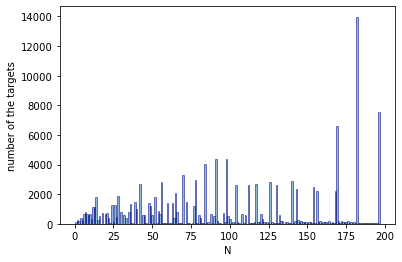

In [5]:
hist_n_targets(nans)

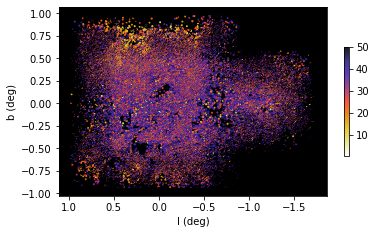

In [6]:
plot_ae_targets(l,b,final_ac,cmap="CMRmap_r")

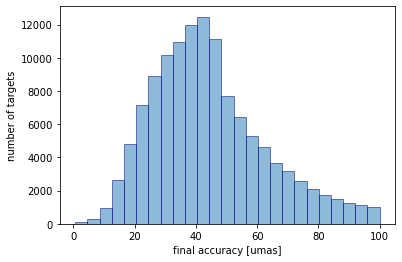

In [7]:
hist_ae_targets(final_ac)

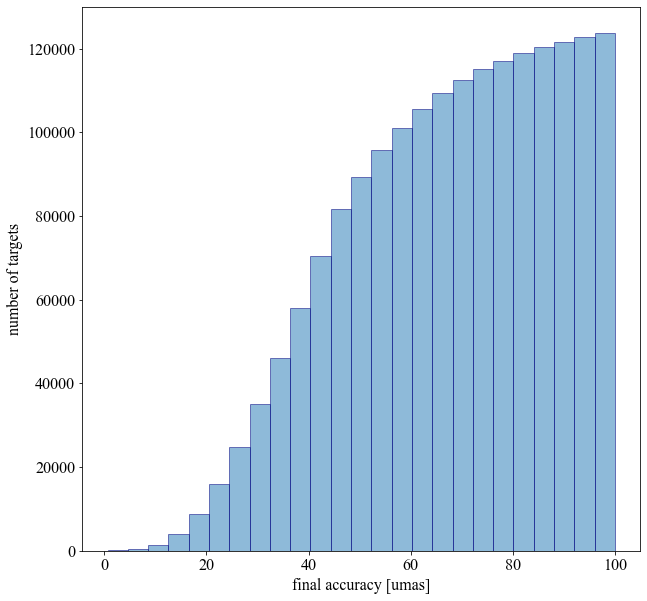

In [13]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
cb=ax.hist(final_ac[final_ac<100.0], alpha=0.5, bins=25, ec='navy', cumulative=True)
ax.set_ylabel("number of targets")
ax.set_xlabel("final accuracy [umas]")
plt.show()

Only select the data with good astrometry accuracy.

In [8]:
ac_limit = 100
ac_ga = final_ac[final_ac<ac_limit]
hw_ga = hw[final_ac<ac_limit]
nans_ga = nans[final_ac<ac_limit]
l_ga = l[final_ac<ac_limit]
b_ga = b[final_ac<ac_limit]
print(' number of tolta observed stars =', np.shape(nans_ga))

 number of tolta observed stars = (123691,)


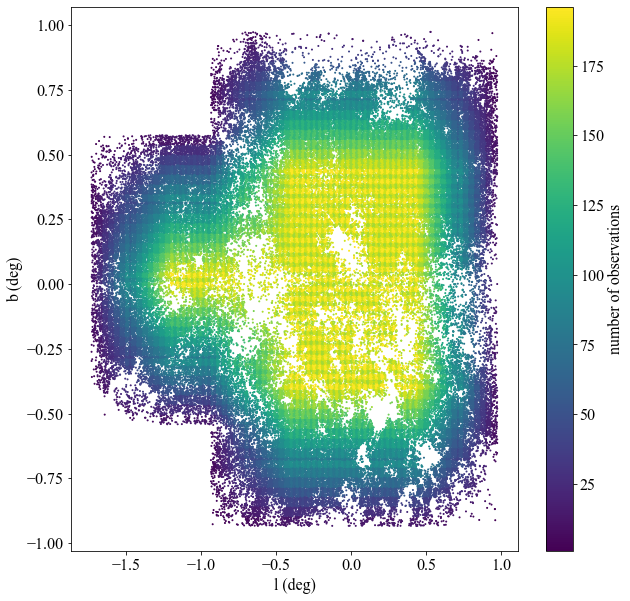

In [9]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
# ax.set_xlim(1.75, -1.75)
# ax.set_ylim(-1.75, 1.75)
cb = ax.scatter(l_ga, b_ga, s=1, c=nans_ga, label='number of observations')
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("l (deg)")
ax.set_ylabel("b (deg)")
plt.show()

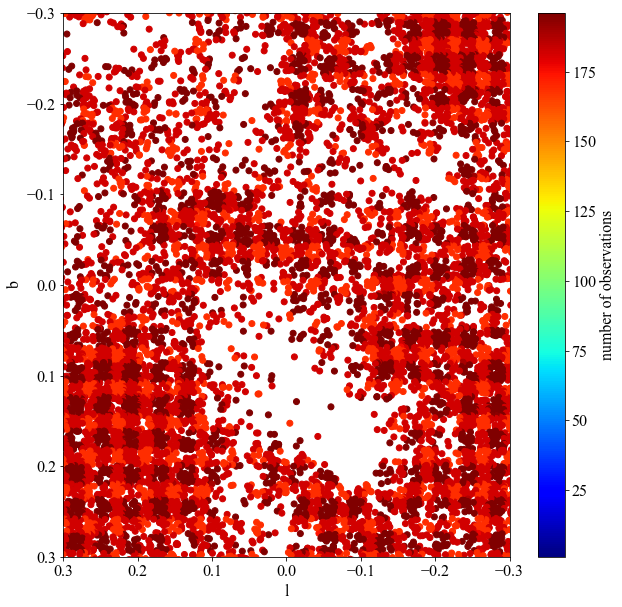

In [10]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(0.3, -0.3)
ax.set_ylim(0.3, -0.3)
cb = ax.scatter(l_ga, b_ga, c=nans_ga, label='number of observations', cmap='jet')
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("l")
ax.set_ylabel("b")
plt.show()

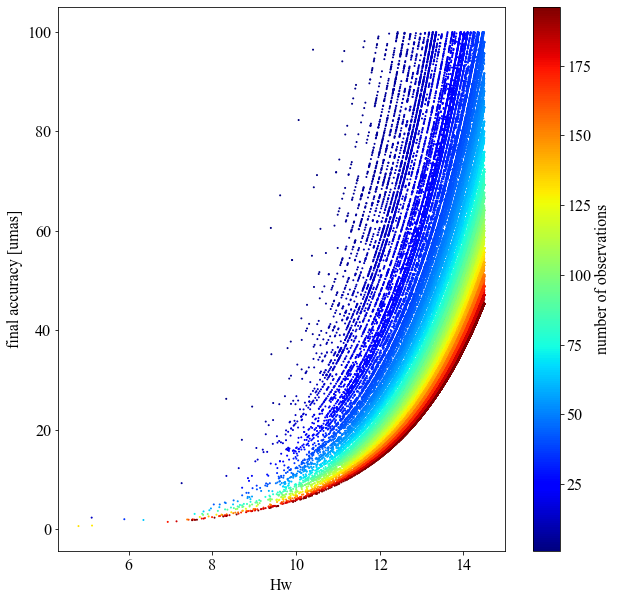

In [11]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
# ax.set_xlim(1.75, -1.75)
# ax.set_ylim(-1.75, 1.75)
cb = ax.scatter(hw_ga, ac_ga, s=1, c=nans_ga, label='number of observations', cmap='jet')
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("Hw")
ax.set_ylabel("final accuracy [umas]")
plt.show()

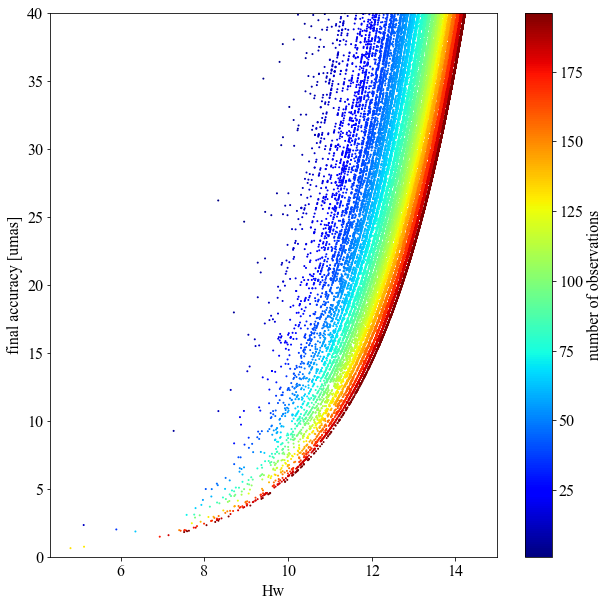

In [12]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
# ax.set_xlim(1.75, -1.75)
ax.set_ylim(0, 40)
cb = ax.scatter(hw_ga, ac_ga, s=1, c=nans_ga, label='number of observations', cmap='jet')
cbar = plt.colorbar(cb)
cbar.set_label('number of observations')
ax.set_xlabel("Hw")
ax.set_ylabel("final accuracy [umas]")
plt.show()